<a href="https://colab.research.google.com/github/pranav98711/Google-Colaboratory/blob/master/DeepLearning/MyProjects/Part1_Logistic_Regression_with_a_Neural_Network_mindset/Logistic_Regression_with_a_Neural_Network_mindset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import h5py
    
    
def load_dataset():
    train_dataset = h5py.File('/content/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('/content/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

In [0]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [0], it's a 'non-cat' picture.


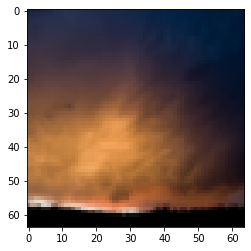

In [0]:
# Example of a picture
index = 0
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [0]:
m_train= train_set_x_orig.shape[0]
m_test = test_set_x_orig[0]
num_px=train_set_x_orig.shape[2]

In [0]:
train_set_x_flatten = train_set_x_orig.reshape(( train_set_x_orig.shape[0],-1 )).T
test_set_x_flatten = test_set_x_orig.reshape( (test_set_x_orig.shape[0],-1 )).T


In [0]:
print(test_set_x_flatten.shape)

In [0]:
train_set_x = train_set_x_flatten/255
test_set_x= test_set_x_flatten/255

## Building parts


In [0]:
def sigmoid(z):
  s=1/(1+np.exp(-z))
  return s

In [0]:
def initialize_with_zeros(dim):
  w=np.zeros((dim,1))
  b=0

  return w,b

In [0]:
def propagate(w,b,X,Y):
  m=X.shape[1]
  A=sigmoid(np.dot(w.T , X) + b)
  cost = -( Y*np.log(A) + (1-Y)*np.log(1-A) )
  dz=A-Y


  dw=(np.dot(X, dz.T)/m)
  db=(np.sum(dz)/m)
  cost = np.sum(cost)/m

  grads={
      "dw" : dw , 
      "db" : db
  }

  return grads,cost

In [0]:
def optimize(w, b , X ,Y , num_iterations, learning_rate , print_cost=False):
  costs=[]

  for i in range(num_iterations):
    grads,cost = propagate(w,b,X,Y)
    dw=grads['dw']
    db=grads['db']
    w=w-(learning_rate*dw)
    b=b-(learning_rate*db)

    if i%100 == 0:
      costs.append(cost)

    if print_cost and i%100 == 0:
      print ("Cost after iteration %i: %f" %(i, cost))

    
  parameters={
      "w" : w,
      "b" : b
  }

  grads={
      "dw" : dw,
      "db" : db
  }

  return parameters,grads,costs



In [0]:
def predict(w,b,X):
  m=X.shape[1]
  Y_prediction=np.zeros((1,m))
  w=w.reshape(X.shape[0] , 1)

  A = 1/(1+np.exp(-(( np.dot(w.T,X) ) + b))  ) 

  for i in range(A.shape[1]):
    if A[0,i] <= 0.5:
      Y_prediction[0,i] = 0
    elif A[0,i] > 0.5:
      Y_prediction[0,i] =1
  return Y_prediction


In [0]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000 , learning_rate=0.5 , print_cost=False):
  w,b=initialize_with_zeros(X_train.shape[0])

  parameters,grads,costs = optimize(w, b , X_train, Y_train,  num_iterations, learning_rate , print_cost)

  w=parameters['w']
  b=parameters['b']

  Y_prediction_test= predict(w,b,X_test)
  Y_prediction_train=predict(w,b,X_train)

  print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
  print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
  d = {"costs": costs,
       "Y_prediction_test": Y_prediction_test, 
       "Y_prediction_train" : Y_prediction_train, 
       "w" : w, 
       "b" : b,
       "learning_rate" : learning_rate,
       "num_iterations": num_iterations}
  return d



In [0]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


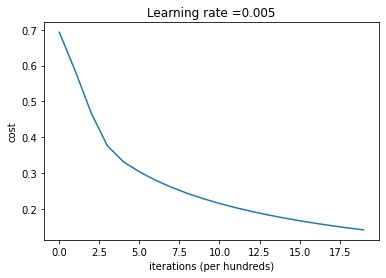

In [0]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

y = 0, you predicted that it is a "non-cat" picture.


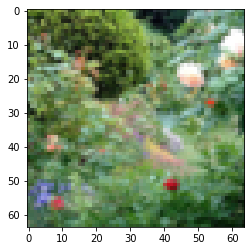

In [0]:
# Example of a picture that was wrongly classified.
index = 49
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0 ,index]) + ", you predicted that it is a \"" + classes[int(d["Y_prediction_test"][0,index])].decode("utf-8") +  "\" picture.")